<a href="https://colab.research.google.com/github/EduardoShoiti/study_Classification_Multiclass/blob/master/Notebooks/Pratica_Multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/classificacao_multiclasse/main/Dados/df_vinho.csv')

In [55]:
df.head()

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,álcool,qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,mediano
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,mediano
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,mediano
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,mediano
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,mediano


In [56]:
df.shape

(1359, 12)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   acidez fixa                1359 non-null   float64
 1   acidez volátil             1359 non-null   float64
 2   ácido cítrico              1359 non-null   float64
 3   açúcar residual            1359 non-null   float64
 4   cloretos                   1359 non-null   float64
 5   dióxido de enxofre livre   1359 non-null   float64
 6   dióxido de enxofre total   1359 non-null   float64
 7   densidade                  1359 non-null   float64
 8   pH                         1359 non-null   float64
 9   sulfatos                   1359 non-null   float64
 10  álcool                     1359 non-null   float64
 11  qualidade                  1359 non-null   object 
dtypes: float64(11), object(1)
memory usage: 127.5+ KB


In [58]:
df['qualidade'].value_counts(normalize=True)

,proportion
qualidade,
mediano,0.818249
bom,0.135394
ruim,0.046358


In [59]:
X = df.drop('qualidade', axis=1)
y = df['qualidade']

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X, X_teste, y, y_teste = train_test_split(X, y, test_size=0.15, random_state=42)

In [62]:
X_treino, X_val, y_treino, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc = RandomForestClassifier(random_state=42, max_depth=10)
rfc.fit(X_treino, y_treino)

y_pred = rfc.predict(X_val)

print(f'Acurácia de treino: {modelo_rf.score(X_treino, y_treino)}')
print(f'Acurácia de validação: {modelo_rf.score(X_val, y_val)}')

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, classification_report

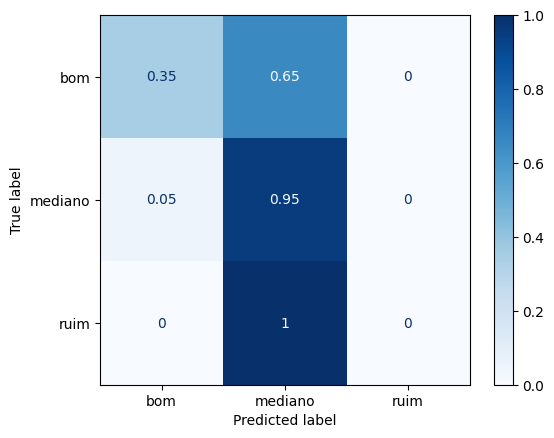

In [66]:
# matriz_confusao = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues')

In [67]:
report = classification_report(y_val, y_pred)
print(report)

              precision    recall  f1-score   support

         bom       0.56      0.35      0.43        26
     mediano       0.84      0.95      0.89       140
        ruim       0.00      0.00      0.00         8

    accuracy                           0.82       174
   macro avg       0.47      0.43      0.44       174
weighted avg       0.76      0.82      0.78       174



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [68]:
from imblearn.over_sampling import SMOTE

In [69]:
oversample = SMOTE(random_state=42)
X_balanceado, y_balanceado = oversample.fit_resample(X_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [70]:
y_balanceado.value_counts()

,count
qualidade,
mediano,802
bom,802
ruim,802


In [71]:
rfc = RandomForestClassifier(random_state=42, max_depth=10)
rfc.fit(X_balanceado, y_balanceado)

y_pred = rfc.predict(X_val)

Resultado Oversampling:
               precision    recall  f1-score   support

         bom       0.44      0.69      0.54        26
     mediano       0.91      0.75      0.82       140
        ruim       0.24      0.50      0.32         8

    accuracy                           0.73       174
   macro avg       0.53      0.65      0.56       174
weighted avg       0.80      0.73      0.76       174



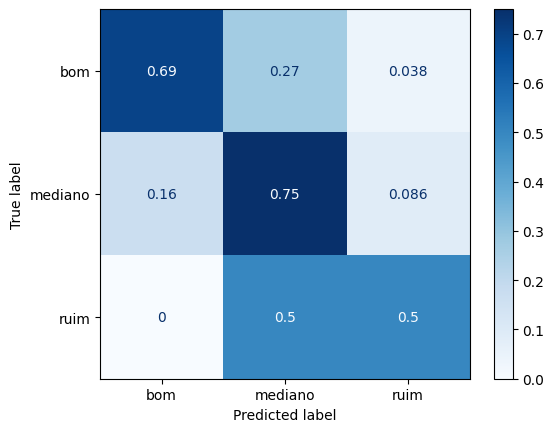

In [72]:
print("Resultado Oversampling:\n", classification_report(y_val, y_pred))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues');

In [73]:
from imblearn.under_sampling import NearMiss

In [74]:
undersample = NearMiss(version=3)
X_balanceado, y_balanceado = undersample.fit_resample(X_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [75]:
rfc = RandomForestClassifier(random_state=42, max_depth=10)
rfc.fit(X_balanceado, y_balanceado)

y_pred = rfc.predict(X_val)

Resultado Undersampling:
               precision    recall  f1-score   support

         bom       0.38      0.77      0.51        26
     mediano       0.91      0.46      0.61       140
        ruim       0.10      0.62      0.17         8

    accuracy                           0.51       174
   macro avg       0.46      0.62      0.43       174
weighted avg       0.80      0.51      0.57       174



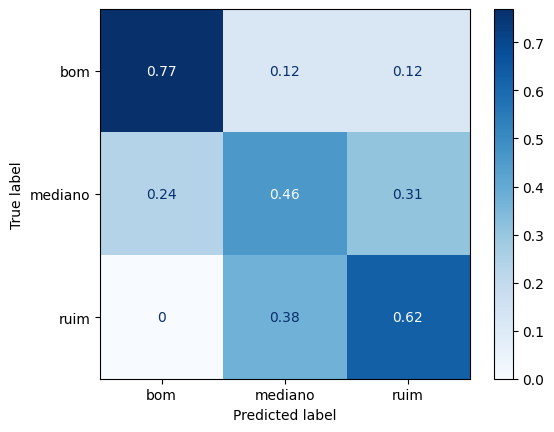

In [77]:
print("Resultado Undersampling:\n", classification_report(y_val, y_pred))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues');

In [79]:
from imblearn.pipeline import Pipeline as imbpipeline

In [80]:
rfc = RandomForestClassifier(random_state=42, max_depth=10)
pipeline = imbpipeline(steps=[('oversample', SMOTE(random_state=42)), ('rfc', rfc)])

In [82]:
from sklearn.model_selection import cross_validate, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [83]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall_weighted')
cv_resultados['test_score']

array([0.71861472, 0.71861472, 0.7012987 , 0.7965368 , 0.74458874])

In [84]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media-2*desvio_padrao}, {min(media+2*desvio_padrao, 1.0)}]')

Intervalo de confiança: [0.669314687232307, 0.8025467846291647]


              precision    recall  f1-score   support

         bom       0.41      0.86      0.55        21
     mediano       0.93      0.80      0.86       170
        ruim       0.43      0.46      0.44        13

    accuracy                           0.78       204
   macro avg       0.59      0.71      0.62       204
weighted avg       0.85      0.78      0.80       204



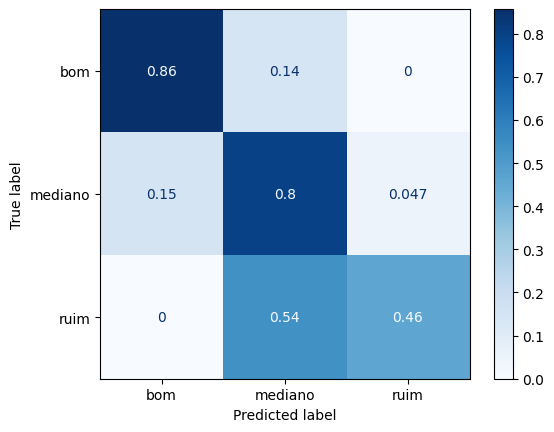

In [85]:
# Teste do modelo com dados de teste

oversample = SMOTE(random_state=42)
X_balanceado, y_balanceado = oversample.fit_resample(X_treino, y_treino)
modelo = RandomForestClassifier(random_state=42, max_depth=10)
modelo.fit(X_balanceado, y_balanceado)
y_pred = modelo.predict(X_teste)

print(classification_report(y_teste, y_pred))
ConfusionMatrixDisplay.from_predictions(y_teste, y_pred, normalize='true', cmap='Blues');